In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
train = pd.read_csv("titanic_train.csv")

Exploratory Data Analysis:

Let's begin some exploratory data analysis! We'll start by checking out missing data!

Missing Data:

We can use seaborn to create a simple heatmap to see where we are missing data!

<Axes: >

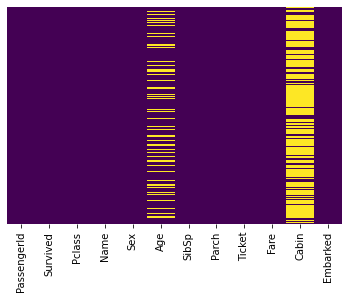

In [5]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap="viridis")


Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. We'll probably drop this later, or change it to another feature like "Cabin Known: 1 or 0"

C:\Users\PRANEE~1\AppData\Local\Temp/ipykernel_17680/1019834150.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data= train,y="Survived",palette="RdBu_r")


<Axes: xlabel='count', ylabel='Survived'>

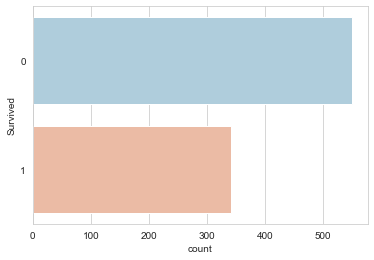

In [16]:
sns.set_style("whitegrid")
sns.countplot(data= train,y="Survived",palette="RdBu_r")

<Axes: xlabel='Survived', ylabel='count'>

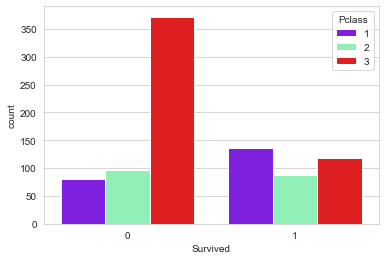

In [17]:

sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

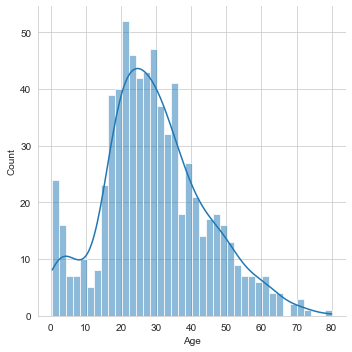

In [21]:
sns.displot(train["Age"].dropna(),bins=40,kde=True)

<Axes: >

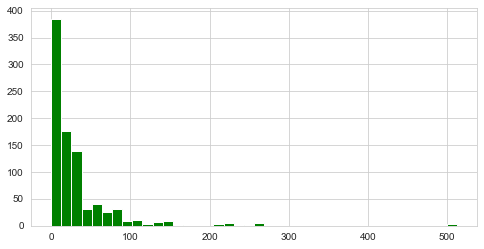

In [22]:
train['Fare'].hist(color='green',bins=40,figsize=(8,4))

Cufflinks for plots:
Let's take a quick moment to show an example of cufflinks!

Data Cleaning
We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation). However we can be smarter about this and check the average age by passenger class. For example:


C:\Users\PRANEE~1\AppData\Local\Temp/ipykernel_17680/2249213625.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')


<Axes: xlabel='Pclass', ylabel='Age'>

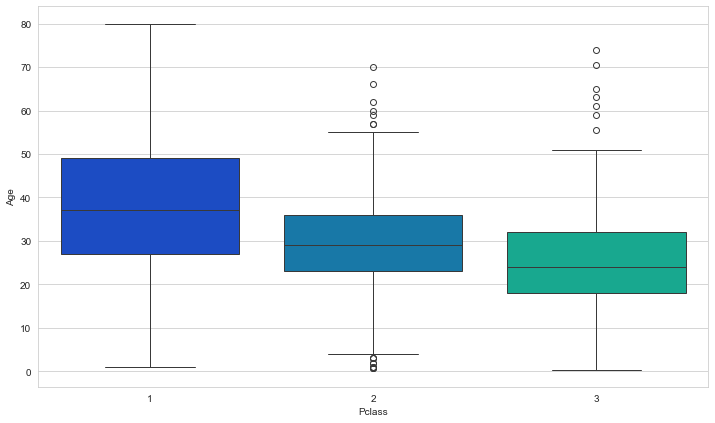

In [35]:

plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')



In [36]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [38]:
train["Age"]=train[["Age","Pclass"]].apply(impute_age,axis=1)

<Axes: >

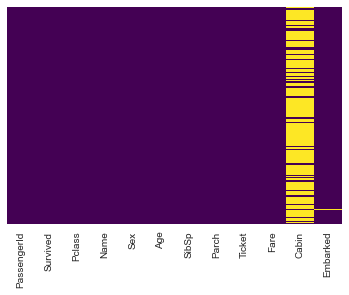

In [39]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap="viridis")